## Problem Definition
Can we predict the price of a bulldozer given its characteristics and previous examples of bulldozer prices.

## Data
From Kaggle competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
e date o

## Evaluation
From: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction r#is. 


es# # Featur 
From: https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictiof the sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parsing Dates
We want to turn the raw data into a datetime object for Pandas to read.

In [2]:
data_frame = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
data_frame.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


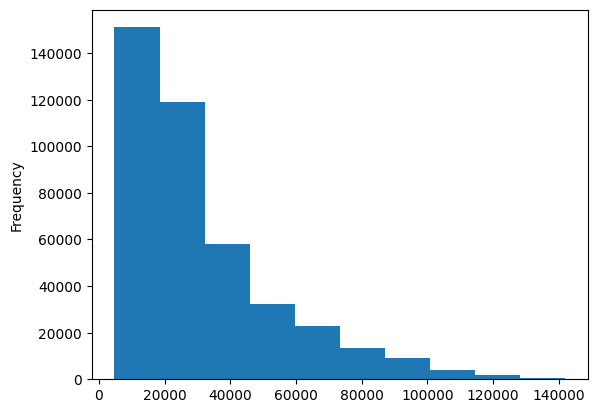

In [3]:
data_frame['SalePrice'].plot.hist();

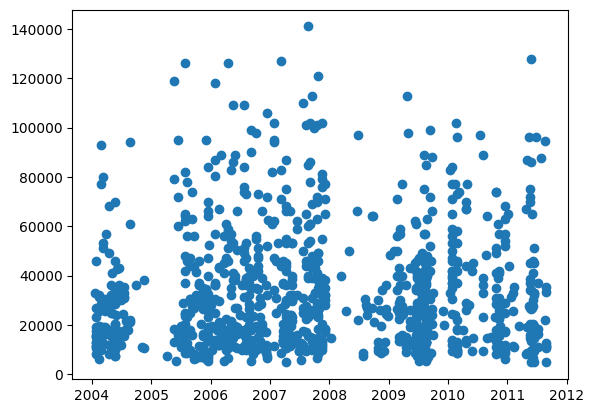

In [4]:
fig, ax = plt.subplots()
ax.scatter(data_frame["saledate"][:1000], data_frame["SalePrice"][:1000]);

### Sort Dataframe by Sale Date
When working with time series data, best practice is to sort the data by date.

In [5]:
data_frame.sort_values(by=["saledate"], inplace=True, ascending=True)
data_frame.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a Copy of the DataFrame
Making sure we have a fallback version of the data.

In [6]:
df_temp = data_frame.copy()

### Add datetime parameters to saledate column

In [7]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [8]:
# since adding datetime parameters makes the saledate column obselete, drop it  
df_temp.drop("saledate", axis=1, inplace=True)

In [9]:
df_temp["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling
Now we do some model-driven EDA.

In [10]:
# importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

# turning strings to categories
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()


### Saving Temporary Dataframe for future use

In [11]:
df_temp.to_csv("data\\bluebook-for-bulldozers\\train_temp.csv", index=False)
df_temp = pd.read_csv("data\\bluebook-for-bulldozers\\train_temp.csv", low_memory=False)

### Filling Missing Values

In [12]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [13]:
# filling missing numeric data
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [14]:
# filling missing numeric data
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        # indicating which bulldozer has missing data 
        df_temp[f"{label}_is_missing"] = pd.isnull(content)
        # filling missing value with median of the column
        df_temp[label] = content.fillna(content.median)


In [15]:
# turn categorical data into numbers and fills missing data
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add Boolean column to indicate whether sample had missing values
        df_temp[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add 1
        df_temp[label] = pd.Categorical(content).codes + 1

In [16]:
# no more missing values!
df_temp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

Now that we have no more missing values and all data is numeric, we can build a ML model.

In [18]:
#%%time
# instantiate model
#model = RandomForestRegressor(n_jobs=-1, random_state=42)

# fit the model
#model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

In [ ]:
# scoring the model
#model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9874801428048305

Why isn't this metric reliable?
Because we've used the same data as what we've learned.

### Splitting data into training and validating sets

In [19]:
# splitting into validation and training sets
df_val = df_temp[df_temp["saleYear"] == 2012]
df_train = df_temp[df_temp["saleYear"] != 2012]

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [20]:
# RMSLE (Root mean squared log error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model, X_train, X_valid, y_train, y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds), 
              "Valid MAE": mean_absolute_error(y_valid, val_preds), 
              "Training RMSLE": rmsle(y_train, train_preds), 
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores
    

Because the training set is too big (400000 rows), we use a subset to test the model to tune hyperparameters.

In [21]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [22]:
show_scores(model, X_train, X_valid, y_train, y_valid)

{'Training MAE': 5569.966734384545,
 'Valid MAE': 7177.30513522855,
 'Training RMSLE': 0.25815692814889707,
 'Valid RMSLE': 0.2932676701203707,
 'Training R^2': 0.8604244776147991,
 'Valid R^2': 0.8317275337770736}

### tuning hyperparameters with RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# instantiate the RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=100,
                                                    cv=5,
                                                    verbose=True)

# fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Python3\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [31]:
# Find the best hyperparameters of the model
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [32]:
best_model = RandomForestRegressor(n_estimators=20,
                                   min_samples_leaf=3,
                                   min_samples_split=2,
                                   max_samples=None,
                                   max_features=0.5,
                                   max_depth=None,
                                   n_jobs=-1,
                                   random_state=42)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [33]:
# model trained on all the data
show_scores(best_model, X_train, X_valid, y_train, y_valid)

{'Training MAE': 2609.0886274813065,
 'Valid MAE': 6095.474820532929,
 'Training RMSLE': 0.13226201191799672,
 'Valid RMSLE': 0.2476676261172259,
 'Training R^2': 0.9653878934907297,
 'Valid R^2': 0.8754689991859728}

In [34]:
# model trained on ~10 000 examples
show_scores(rs_model, X_train, X_valid, y_train, y_valid)

{'Training MAE': 5993.605960667172,
 'Valid MAE': 7424.848031841356,
 'Training RMSLE': 0.2730843701549586,
 'Valid RMSLE': 0.3021473089621147,
 'Training R^2': 0.839626974584339,
 'Valid R^2': 0.8212642495253034}

## Making Predictions on Test Data

In [86]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/test.csv")
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Pre-processing and Cleaning the Test Data

In [87]:
def preprocess_df(dataframe: pd.DataFrame):
    """Transforms dataframe and returns the transformed dataframe"""
    
    dataframe["saledate"] = pd.to_datetime(dataframe["saledate"])
    
    # Extracted information from the saledate column
    dataframe["saleYear"] = dataframe.saledate.dt.year
    dataframe["saleMonth"] = dataframe.saledate.dt.month
    dataframe["saleDay"] = dataframe.saledate.dt.day
    dataframe["saleDayOfWeek"] = dataframe.saledate.dt.dayofweek
    dataframe["saleDayOfYear"] = dataframe.saledate.dt.dayofyear
    dataframe.drop("saledate", axis=1, inplace=True)

    # Fill missing data in the numeric columns with the median
    for label, content in dataframe.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            # indicating which bulldozer has missing data 
            dataframe[f"{label}_is_missing"] = pd.isnull(content)
            # filling missing value with median of the column
            dataframe[label] = content.fillna(content.median())
        
        # fill missing categorical data and convert the categories to numeric types
        if not pd.api.types.is_numeric_dtype(content):
            dataframe[f"{label}_is_missing"] = pd.isnull(content)
            # adding +1 to the category because pandas encodes missing data as -1
            dataframe[label] = pd.Categorical(content).codes + 1
    
    return dataframe

In [88]:
df_test = preprocess_df(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


Problem: the `df_test` has a different number of columns than `X_train`

In [89]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [90]:
# manually adjust df_test to have auctioneerID_is_missing column at position 56 to match X_train
df_test.insert(56, "auctioneerID_is_missing", False)


Now we can make predictions

In [93]:
test_preds = best_model.predict(df_test)

In [97]:
# format the predictions in the style Kaggle is asking for
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [98]:
df_preds

,SalesID,SalesPrice
0,1227829,18182.678571
1,1227844,18704.097222
2,1227847,49027.864011
3,1227848,72667.278139
4,1227863,55156.343975
...,...,...
12452,6643171,41714.325397
12453,6643173,13009.166667
12454,6643184,14333.013889
12455,6643186,18205.669643


In [99]:
# df_preds.to_csv("data/bluebook-for-bulldozers/predictions.csv", index=False)

## Feature Importance

Figuring out which attributes of the data are more significant to the predictions.

In [102]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"Features": columns,
                        "Feature_importances": importances})
                        .sort_values("Feature_importances", ascending=False)
                        .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["Features"][:n], df["Feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

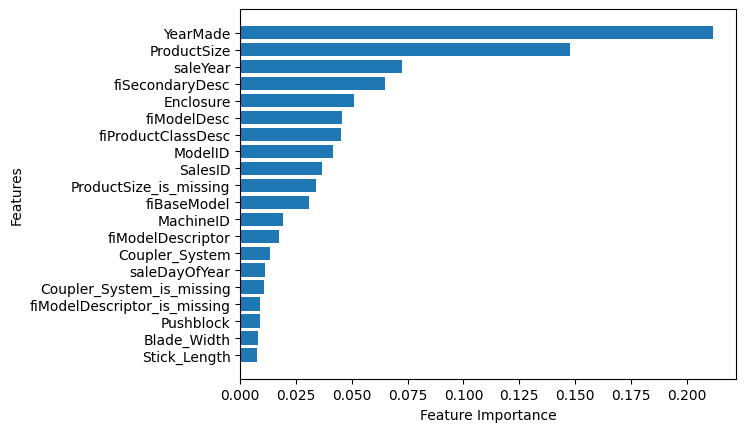

In [103]:
plot_features(X_train.columns, best_model.feature_importances_)